In [1]:

import seaborn as sns
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import pandas as pd

# Attempt to read the CSV file with a specified encoding
df = pd.read_csv(r'D:\Project\Python\Class\bia_laptop_price\laptop_price.csv', encoding='unicode_escape')
df.head(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45


In [3]:
# df = df.drop('Product', axis=1)
# df

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

label_encoder = LabelEncoder()

df['Company_encoded'] = label_encoder.fit_transform(df['Company'])


In [5]:
label_encoder = LabelEncoder()
df['TypeName_encoded'] = label_encoder.fit_transform(df['TypeName'])

In [6]:
# from collections import Counter
# cpu_counts = Counter(df['Cpu'])
# df = df[df['Cpu'].map(cpu_counts) > 1]

In [7]:
df['OpSys'].unique()
df['OpSys'].replace({'Windows 10 S': 'Windows 10', 'Mac OS X': 'macOS'}, inplace=True)

C:\Users\jay\AppData\Local\Temp\ipykernel_684\2875529598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OpSys'].replace({'Windows 10 S': 'Windows 10', 'Mac OS X': 'macOS'}, inplace=True)


In [8]:
df['OpSys'].value_counts()
df = df[df['OpSys'] != 'Android']
df['OpSys'].value_counts()

OpSys
Windows 10    1080
No OS           66
Linux           62
Windows 7       45
Chrome OS       27
macOS           21
Name: count, dtype: int64

In [9]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1301, dtype: object

In [10]:
import re

df['resolution'] = df['ScreenResolution'].apply(lambda x: re.search(r'\d+x\d+', x).group())


df[['resolution_width', 'resolution_height']] = df['resolution'].str.split('x', expand=True)
df['resolution_width'] = df['resolution_width'].astype(int)
df['resolution_height'] = df['resolution_height'].astype(int)

print(df[['resolution_width', 'resolution_height']].head())

df.head()

   resolution_width  resolution_height
0              2560               1600
1              1440                900
2              1920               1080
3              2880               1800
4              2560               1600


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Company_encoded,TypeName_encoded,resolution,resolution_width,resolution_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1,4,2560x1600,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1,4,1440x900,1440,900
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,7,3,1920x1080,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1,4,2880x1800,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1,4,2560x1600,2560,1600


In [11]:
# df['Resolution'] = df['ScreenResolution'].apply(lambda x: int(x.split('x')[0]) * int(x.split('x')[1]))
# df['Resolution']

In [12]:
df.isnull().sum()

laptop_ID            0
Company              0
Product              0
TypeName             0
Inches               0
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight               0
Price_euros          0
Company_encoded      0
TypeName_encoded     0
resolution           0
resolution_width     0
resolution_height    0
dtype: int64

In [13]:
df['TypeName'].unique()
df['TypeName'].replace('Netbook', 'Notebook', inplace=True)


C:\Users\jay\AppData\Local\Temp\ipykernel_684\1502661640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TypeName'].replace('Netbook', 'Notebook', inplace=True)


In [14]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [15]:
df.head(5)

df['Ram'] = df['Ram'].replace(r'GB', '', regex=True)

# Convert the column to float
df['Ram'] = df['Ram'].astype(int)




In [16]:
df['Weight'] = df['Weight'].replace(r'kg', '', regex=True)

df['Weight'] = df['Weight'].astype(float)
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1301, dtype: float64

In [17]:
df['Cpu_Brand'] = df['Cpu'].str.split().str[0]

df['Cpu_Type'] = df['Cpu'].str.extract(r'(Core \w+\d|\w+-Series)')

df['Cpu_ClockSpeed'] = df['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')


In [18]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Company_encoded,TypeName_encoded,resolution,resolution_width,resolution_height,Cpu_Brand,Cpu_Type,Cpu_ClockSpeed
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,1.37,1339.69,1,4,2560x1600,2560,1600,Intel,Core i5,2.3GHz
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.94,1,4,1440x900,1440,900,Intel,Core i5,1.8GHz
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,1.86,575.00,7,3,1920x1080,1920,1080,Intel,Core i5,2.5GHz
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,1.83,2537.45,1,4,2880x1800,2880,1800,Intel,Core i7,2.7GHz
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,1.37,1803.60,1,4,2560x1600,2560,1600,Intel,Core i5,3.1GHz


In [19]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Identify all object (string) columns
# string_columns = df.select_dtypes(include=['object']).columns

# # Apply LabelEncoder to all string columns
# for column in string_columns:
#     df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# df.head()

In [20]:
le = LabelEncoder()
object_counlm = df.select_dtypes(include=["object"]).columns

for i in object_counlm :
    df[i] = le.fit_transform(df[i])
    
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Company_encoded,TypeName_encoded,resolution,resolution_width,resolution_height,Cpu_Brand,Cpu_Type,Cpu_ClockSpeed
0,1,1,300,3,13.3,10,65,8,4,58,...,1.37,1339.69,1,4,10,2560,1600,1,18,15
1,2,1,301,3,13.3,1,63,8,2,51,...,1.34,898.94,1,4,1,1440,900,1,18,9
2,3,7,50,2,15.6,3,74,8,16,53,...,1.86,575.00,7,3,3,1920,1080,1,18,18
3,4,1,300,3,15.4,12,85,16,29,9,...,1.83,2537.45,1,4,12,2880,1800,1,19,21
4,5,1,300,3,13.3,10,67,8,16,59,...,1.37,1803.60,1,4,10,2560,1600,1,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,580,0,14.0,3,89,4,4,47,...,1.80,638.00,10,0,3,1920,1080,1,19,18
1299,1317,10,588,0,13.3,13,89,16,29,47,...,1.30,1499.00,10,0,13,3200,1800,1,19,18
1300,1318,10,196,2,14.0,0,34,2,35,40,...,1.50,229.00,10,3,0,1366,768,1,9,8
1301,1319,7,2,2,15.6,0,89,6,10,21,...,2.19,764.00,7,3,0,1366,768,1,19,18


<Axes: xlabel='Price_euros'>

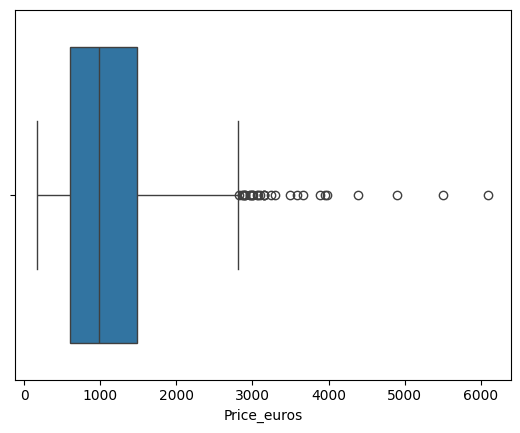

In [21]:
sns.boxplot(x = 'Price_euros',data = df)

In [22]:
q1 = df['Price_euros'].quantile(0.25)
q3 = df['Price_euros'].quantile(0.75)

iqr = q3 - q1

min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)

df = df[df['Price_euros'] <= max_range]

<Axes: xlabel='Price_euros'>

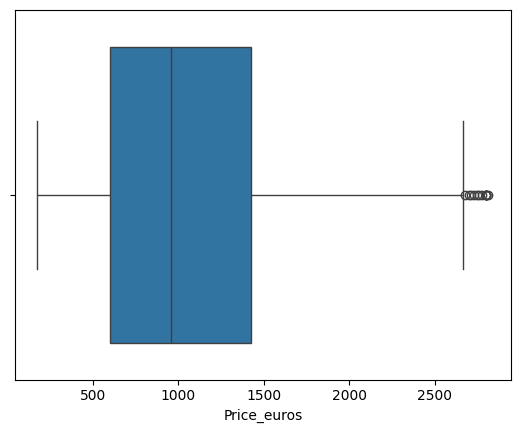

In [23]:
sns.boxplot(x = 'Price_euros',data = df)

In [24]:
X = df.drop(columns=['Price_euros', 'laptop_ID','Company','resolution','ScreenResolution'])
y = df['Price_euros']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

# Save model in local  
joblib.dump(model, 'logistic_regression_model.pkl')

# Save the data
np.savez('data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"r2 : {r2}")

mae : 234.4184605083745
mse : 98278.51337356734
r2 : 0.7442994851930649


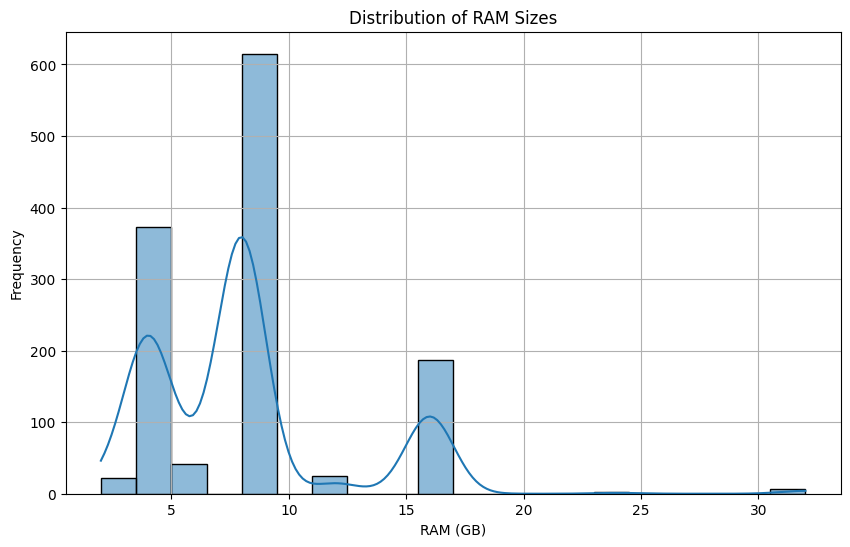

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ram'], bins=20, kde=True)
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\jay\AppData\Local\Temp\ipykernel_684\3810574504.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


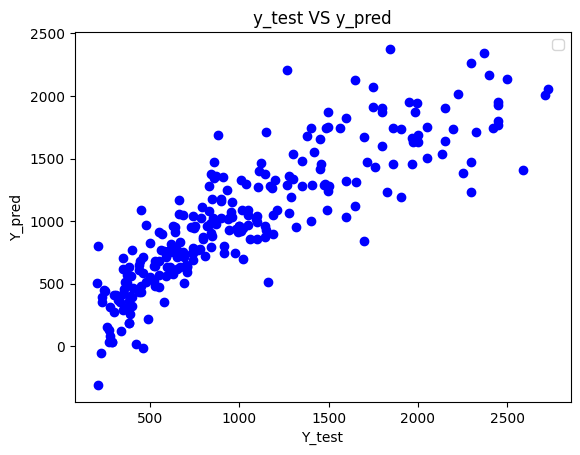

In [30]:
plt.scatter(y_test, y_pred,  color= 'blue')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('y_test VS y_pred')
plt.legend()

In [31]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Company_encoded,TypeName_encoded,resolution,resolution_width,resolution_height,Cpu_Brand,Cpu_Type,Cpu_ClockSpeed
0,1,1,300,3,13.3,10,65,8,4,58,...,1.37,1339.69,1,4,10,2560,1600,1,18,15
1,2,1,301,3,13.3,1,63,8,2,51,...,1.34,898.94,1,4,1,1440,900,1,18,9
2,3,7,50,2,15.6,3,74,8,16,53,...,1.86,575.00,7,3,3,1920,1080,1,18,18
3,4,1,300,3,15.4,12,85,16,29,9,...,1.83,2537.45,1,4,12,2880,1800,1,19,21
4,5,1,300,3,13.3,10,67,8,16,59,...,1.37,1803.60,1,4,10,2560,1600,1,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,580,0,14.0,3,89,4,4,47,...,1.80,638.00,10,0,3,1920,1080,1,19,18
1299,1317,10,588,0,13.3,13,89,16,29,47,...,1.30,1499.00,10,0,13,3200,1800,1,19,18
1300,1318,10,196,2,14.0,0,34,2,35,40,...,1.50,229.00,10,3,0,1366,768,1,9,8
1301,1319,7,2,2,15.6,0,89,6,10,21,...,2.19,764.00,7,3,0,1366,768,1,19,18


In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"r2 : {r2}")

mae : 234.4184605083745
mse : 98278.51337356734
r2 : 0.7442994851930649


In [33]:
model = joblib.load('logistic_regression_model.pkl')

# Load the data
data = np.load('data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# You can now use the loaded model and data
predictions = model.predict(X_test)


c:\Users\jay\anaconda3\envs\bia\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
y_pred = model.predict(X_test)

c:\Users\jay\anaconda3\envs\bia\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"r2 : {r2}")

mae : 234.4184605083745
mse : 98278.51337356734
r2 : 0.7442994851930649
